# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('D:/Rama Syamala\Python Practice/3.KNN/train_data.csv')
resource_data = pd.read_csv('D:/Rama Syamala\Python Practice/3.KNN/resources.csv')

In [3]:
# before preprocessing, the data should be split into training and test sets. 

from sklearn.utils import shuffle
project_data = shuffle(project_data, random_state=42)
project_data = project_data[0:60000]

# selecting only few instances
from sklearn.model_selection import train_test_split
# project_data_train,project_data_val = train_test_split(project_data, test_size=0.20, random_state=42)
project_data,project_data_test = train_test_split(project_data,test_size=0.25, random_state=42)

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (45000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [7]:
# to do response coding on clean_categories

#seperate dictionaries for positive class and negative classes

cat_positive = project_data['clean_categories'][project_data['project_is_approved']==1]

cat_positive = np.array(cat_positive)

my_counter_positive = Counter()

for word in cat_positive:
    my_counter_positive.update(word.split())
    
cat_positive_response = dict(my_counter_positive)


# for negative class

cat_negative = project_data['clean_categories'][project_data['project_is_approved']==0]

cat_negative = np.array(cat_negative)

my_counter_negative = Counter()

for word in cat_negative:
    my_counter_negative.update(word.split())
    
cat_negative_response = dict(my_counter_negative)

In [8]:
response_cat_final = np.zeros((project_data.shape[0],2))

count = 0
for word in project_data['clean_categories'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_cat_final[count][0] = count_positive/(count_positive + count_negative)
        response_cat_final[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1
            

In [9]:
# for test data
catogories = list(project_data_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list_test = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list_test.append(temp.strip())
    
project_data_test['clean_categories'] = cat_list_test
project_data_test.drop(['project_subject_categories'], axis=1, inplace=True)


In [10]:
# for test data

response_cat_test = np.zeros((project_data_test.shape[0],2))

count = 0
for word in project_data_test['clean_categories'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_cat_test[count][0] = count_positive/(count_positive + count_negative)
        response_cat_test[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1


## 1.3 preprocessing of `project_subject_subcategories`

In [11]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [12]:
# to do response coding on clean_subcategories

#seperate dictionaries for positive class and negative classes

sub_cat_positive = project_data['clean_subcategories'][project_data['project_is_approved']==1]

sub_cat_positive = np.array(sub_cat_positive)

my_counter_positive = Counter()

for word in sub_cat_positive:
    my_counter_positive.update(word.split())
    
subcat_positive_response = dict(my_counter_positive)


# for negative class

subcat_negative = project_data['clean_subcategories'][project_data['project_is_approved']==0]

subcat_negative = np.array(subcat_negative)

my_counter_negative = Counter()

for word in subcat_negative:
    my_counter_negative.update(word.split())
    
subcat_negative_response = dict(my_counter_negative)


response_subcat_final = np.zeros((project_data.shape[0],2))

count = 0
for word in project_data['clean_subcategories'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_subcat_final[count][0] = count_positive/(count_positive + count_negative)
        response_subcat_final[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1
            

In [13]:
sub_catogories = list(project_data_test['project_subject_subcategories'].values)
sub_cat_list_test = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list_test.append(temp.strip())

project_data_test['clean_subcategories'] = sub_cat_list_test
project_data_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

In [14]:
response_subcat_test = np.zeros((project_data_test.shape[0],2))

count = 0
for word in project_data_test['clean_subcategories'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_subcat_test[count][0] = count_positive/(count_positive + count_negative)
        response_subcat_test[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1
            

## 1.3 Text preprocessing

In [15]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [16]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
84917,74104,p095763,beedd87758d501a417bfd8f56b53b68a,Mrs.,UT,2017-03-23 18:50:38,Grades PreK-2,Let Me Pick Your Brain! Engaging Kids With Mat...,I have 21 second grade students who come from ...,I will use these speed and logic math games as...,NaN,NaN,My students need 11 new challenging math games...,1,1,Math_Science,Mathematics,I have 21 second grade students who come from ...
71072,51939,p031280,1d3432676a53c44d2998326a38cebceb,Ms.,VA,2017-04-05 07:46:08,Grades 3-5,Yoga and Mindfulness,We work at a Title 1 elementary school in an ...,Many of our students need more than just acade...,NaN,NaN,My students need yoga mats so they have a safe...,0,1,Health_Sports SpecialNeeds,Gym_Fitness SpecialNeeds,We work at a Title 1 elementary school in an ...


In [17]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)


I have 21 second grade students who come from many different social and economic backgrounds. They all have different learning abilities and learning styles, too. As I have taught in this Utah neighborhood, I have seen many changes over the past several years. Technology and the way kids learn have drastically changed. I am constantly looking for ways to motivate each student to learn, while at the same time, trying to make learning fun.  More than anything I want my students to enjoy school, feel safe, and know that I love them.I will use these speed and logic math games as part of math rotations in my classroom.  Playing games encourages strategic mathematical thinking as students find different strategies for solving problems.  The quick thinking games will help to increase their math processing speed.\r\n\r\nResearch has shown that a child can increase their IQ by 13 percent just by playing reasoning and speed processing games.  \r\n\r\nChildren these days are motivated by games.  

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[200])
print(sent)
print("="*50)

A typical day in my classroom is filled with questions.  Questions on why and how things work.  Getting their hands on items, designing, and creating are always a goal my students strive for.  Science and math are the way of the future for our future leaders!  Please help them achieve their goals!My students are inspiring 3rd graders who love science!  They love experiments and question why things are the way they are.  They come to school with the expectation to be and feel safe, be respected, and enjoy learning.  Our school strives to develop strong role models, and my class has a bunch!  I am very proud of them!  They require guidance on how to achieve their goals, both short and long term.  my main goal is for them to leave 3rd grade with the love of questioning, trying, and doing.  Reading is not enough for my students, and I understand that.  My students need to move and express their thoughts and opinions, as all students do.  The love of conversing is strong, and what a great w

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

A typical day in my classroom is filled with questions.  Questions on why and how things work.  Getting their hands on items, designing, and creating are always a goal my students strive for.  Science and math are the way of the future for our future leaders!  Please help them achieve their goals!My students are inspiring 3rd graders who love science!  They love experiments and question why things are the way they are.  They come to school with the expectation to be and feel safe, be respected, and enjoy learning.  Our school strives to develop strong role models, and my class has a bunch!  I am very proud of them!  They require guidance on how to achieve their goals, both short and long term.  my main goal is for them to leave 3rd grade with the love of questioning, trying, and doing.  Reading is not enough for my students, and I understand that.  My students need to move and express their thoughts and opinions, as all students do.  The love of conversing is strong, and what a great w

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

A typical day in my classroom is filled with questions Questions on why and how things work Getting their hands on items designing and creating are always a goal my students strive for Science and math are the way of the future for our future leaders Please help them achieve their goals My students are inspiring 3rd graders who love science They love experiments and question why things are the way they are They come to school with the expectation to be and feel safe be respected and enjoy learning Our school strives to develop strong role models and my class has a bunch I am very proud of them They require guidance on how to achieve their goals both short and long term my main goal is for them to leave 3rd grade with the love of questioning trying and doing Reading is not enough for my students and I understand that My students need to move and express their thoughts and opinions as all students do The love of conversing is strong and what a great way to communicate through science Wit

In [22]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", 'nannan']

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 45000/45000 [00:17<00:00, 2579.72it/s]


In [24]:
# after preprocesing
preprocessed_essays[200]

'a typical day classroom filled questions questions things work getting hands items designing creating always goal students strive science math way future future leaders please help achieve goals my students inspiring 3rd graders love science they love experiments question things way they come school expectation feel safe respected enjoy learning our school strives develop strong role models class bunch i proud they require guidance achieve goals short long term main goal leave 3rd grade love questioning trying reading not enough students i understand my students need move express thoughts opinions students the love conversing strong great way communicate science with busy lives tight budgets many students not opportunity go science museums connect science math real life experiences the classroom may opportunity relate connect that job help the resources i requesting physical science discipline we talk physical science we talk energy forces newton laws the students also need know thing

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [25]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also


from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 45000/45000 [00:00<00:00, 59159.42it/s]


## 1.5 Preparing data for models

In [26]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [27]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_cat.fit_transform(project_data['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (45000, 9)


In [28]:
# we use count vectorizer to convert the values into one 
vectorizer_subcat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_subcat.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer_subcat.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'ForeignLanguages', 'Civics_Government', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'ESL', 'EarlyDevelopment', 'Health_LifeScience', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (45000, 30)


In [29]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

# for school_state



from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

vectorizer_sc_state = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
school_state_one_hot = vectorizer_sc_state.fit_transform(project_data['school_state'].values)
print(vectorizer_sc_state.get_feature_names())
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['VT', 'WY', 'ND', 'MT', 'SD', 'AK', 'RI', 'NE', 'NH', 'DE', 'WV', 'HI', 'ME', 'NM', 'DC', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'MS', 'NV', 'KY', 'MD', 'CT', 'TN', 'AL', 'UT', 'WI', 'VA', 'NJ', 'AZ', 'OK', 'OH', 'WA', 'MA', 'LA', 'MO', 'IN', 'MI', 'PA', 'GA', 'SC', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']
Shape of matrix after one hot encodig  (45000, 51)


In [30]:
# to do response coding on clean_categories

#seperate dictionaries for positive class and negative classes

school_state_positive = project_data['school_state'][project_data['project_is_approved']==1]

school_state_positive = np.array(school_state_positive)

my_counter_positive = Counter()

for word in school_state_positive:
    my_counter_positive.update(word.split())
    
school_state_positive_response = dict(my_counter_positive)


# for negative class

school_state_negative = project_data['school_state'][project_data['project_is_approved']==0]

school_state_negative = np.array(school_state_negative)

my_counter_negative = Counter()

for word in school_state_negative:
    my_counter_negative.update(word.split())
    
school_state_negative_response = dict(my_counter_negative)


response_school_state_final = np.zeros((project_data.shape[0],2))

count = 0
for word in project_data['school_state'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_school_state_final[count][0] = count_positive/(count_positive + count_negative)
        response_school_state_final[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1
            

In [31]:

response_school_state_test = np.zeros((project_data_test.shape[0],2))

count = 0
for word in project_data_test['school_state'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_school_state_test[count][0] = count_positive/(count_positive + count_negative)
        response_school_state_test[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1

In [32]:
# for teacher_prefix
project_data["teacher_prefix"] = project_data["teacher_prefix"].fillna('Mrs.')


from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer_prefix = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
teacher_prefix_one_hot = vectorizer_prefix.fit_transform(project_data['teacher_prefix'].values)
print(vectorizer_prefix.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Dr.', 'Teacher', 'Mr.', 'Ms.', 'Mrs.']
Shape of matrix after one hot encodig  (45000, 5)


In [33]:
# to do response coding on clean_categories

#seperate dictionaries for positive class and negative classes

teacher_prefix_positive = project_data['teacher_prefix'][project_data['project_is_approved']==1]

teacher_prefix_positive = np.array(teacher_prefix_positive)

my_counter_positive = Counter()

for word in teacher_prefix_positive:
    my_counter_positive.update(word.split())
    
teacher_prefix_positive_response = dict(my_counter_positive)


# for negative class

teacher_prefix_negative = project_data['teacher_prefix'][project_data['project_is_approved']==0]

teacher_prefix_negative = np.array(teacher_prefix_negative)

my_counter_negative = Counter()

for word in teacher_prefix_negative:
    my_counter_negative.update(word.split())
    
teacher_prefix_negative_response = dict(my_counter_negative)


response_teacher_prefix_final = np.zeros((project_data.shape[0],2))

count = 0
for word in project_data['teacher_prefix'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_teacher_prefix_final[count][0] = count_positive/(count_positive + count_negative)
        response_teacher_prefix_final[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1
            

In [34]:
project_data_test["teacher_prefix"] = project_data_test["teacher_prefix"].fillna('Mrs.')

response_teacher_prefix_test = np.zeros((project_data_test.shape[0],2))

count = 0
for word in project_data_test['teacher_prefix'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_teacher_prefix_test[count][0] = count_positive/(count_positive + count_negative)
        response_teacher_prefix_test[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1
            

In [35]:
# for project_grade_category

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    word = word.replace('Grades', ' ')
    my_counter.update(word.split())
    
    

project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))



vectorizer_grade_cat = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer_grade_cat.fit_transform(project_data['project_grade_category'].values)
print(vectorizer_grade_cat.get_feature_names())

project_grade_one_hot = vectorizer_grade_cat.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2']
Shape of matrix after one hot encodig  (45000, 4)


In [36]:
# to do response coding on clean_categories

#seperate dictionaries for positive class and negative classes

project_grade_positive = project_data['project_grade_category'][project_data['project_is_approved']==1]

project_grade_positive = np.array(project_grade_positive)

my_counter_positive = Counter()

for word in project_grade_positive:
    my_counter_positive.update(word.split())
    
project_grade_positive_response = dict(my_counter_positive)


# for negative class

project_grade_negative = project_data['project_grade_category'][project_data['project_is_approved']==0]

project_grade_negative = np.array(project_grade_negative)

my_counter_negative = Counter()

for word in project_grade_negative:
    my_counter_negative.update(word.split())
    
project_grade_negative_response = dict(my_counter_negative)


response_project_grade_final = np.zeros((project_data.shape[0],2))

count = 0
for word in project_data['project_grade_category'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_project_grade_final[count][0] = count_positive/(count_positive + count_negative)
        response_project_grade_final[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1
            

In [37]:
response_project_grade_test = np.zeros((project_data_test.shape[0],2))

count = 0
for word in project_data_test['project_grade_category'].values:
    
    for w in word.split():
        
        count_positive = my_counter_positive[w]
        count_negative = my_counter_negative[w]
        
        response_project_grade_test[count][0] = count_positive/(count_positive + count_negative)
        response_project_grade_test[count][1] = count_negative/(count_positive + count_negative)
        
        
    count+=1

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [38]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer_bow_text = CountVectorizer(min_df=10)
text_bow = vectorizer_bow_text.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (45000, 11773)


In [39]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

# https://stackoverflow.com/a/47091490/4084039

#title is already preprocessed in one of the above cells
# titles could not be very common words, which are dependent on the project proposal. We choose atleast 5 documents here

vectorizer_bow_titles = CountVectorizer(min_df=5)
titles_bow = vectorizer_bow_titles.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encoding", titles_bow.shape )


Shape of matrix after one hot encoding (45000, 3030)


#### 1.5.2.2 TFIDF vectorizer

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tfidf_text = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer_tfidf_text.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

vectorizer_tfidf_title = TfidfVectorizer(min_df=5)
title_tfidf = vectorizer_tfidf_title.fit_transform(preprocessed_titles)
print("Schape of matrix after one hot encoding ",title_tfidf.shape)

Shape of matrix after one hot encodig  (45000, 11773)
Schape of matrix after one hot encoding  (45000, 3030)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [41]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [42]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model_glove = pickle.load(f)
    glove_words =  set(model_glove.keys())

In [43]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model_glove[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 45000/45000 [00:08<00:00, 5062.12it/s]


45000
300


In [44]:
# average Word2Vec
# compute average word2vec for each title.
avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model_glove[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles.append(vector)

print(len(avg_w2v_titles))
print(len(avg_w2v_titles[0]))

100%|████████████████████████████████████████████████████████████████████████| 45000/45000 [00:00<00:00, 109350.64it/s]


45000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [45]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [46]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model_glove[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 45000/45000 [01:06<00:00, 680.18it/s]


45000
300


In [47]:
# Similarly you can vectorize for title also
# vectorizing titles

tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model_glove[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles.append(vector)

print(len(tfidf_w2v_titles))
print(len(tfidf_w2v_titles[0]))


100%|█████████████████████████████████████████████████████████████████████████| 45000/45000 [00:00<00:00, 50496.14it/s]


45000
300


### 1.5.3 Vectorizing Numerical features

In [48]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [49]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data_train['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

# for number of previously submitted projects

previous_projects_scalar = StandardScaler()
previous_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previous_projects_standardized = previous_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [50]:
price_standardized

array([[-0.60298925],
       [-0.68096773],
       [-0.30037878],
       ...,
       [-0.43946289],
       [-0.32283923],
       [-0.04780887]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [51]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(45000, 9)
(45000, 30)
(45000, 11773)
(45000, 1)


In [52]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(45000, 11813)

In [54]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [53]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

C:\Users\NIT\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Random Forest and XG Boost

#### Response Coding: Example

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [56]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [54]:
# Merging all the features to form set 1

# categorical(instead of one hot encoding, try response coding: 
#             use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)

price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data_test = pd.merge(project_data_test, price_data, on='id', how='left')

price_scalar = StandardScaler()
price_scalar.fit(project_data_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized_test = price_scalar.transform(project_data_test['price'].values.reshape(-1, 1))

# for number of previously submitted projects

previous_projects_scalar = StandardScaler()
previous_projects_scalar.fit(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previous_projects_standardized_test = previous_projects_scalar.transform(project_data_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))




C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



In [55]:
project_data_test["essay"] = project_data_test["project_essay_1"].map(str) +\
                        project_data_test["project_essay_2"].map(str) + \
                        project_data_test["project_essay_3"].map(str) + \
                        project_data_test["project_essay_4"].map(str)

In [56]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays_test = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_test.append(sent.lower().strip())
    
    
# similarly you can preprocess the titles also


from tqdm import tqdm
preprocessed_titles_test = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles_test.append(sent.lower().strip())
    

100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 58693.66it/s]


In [57]:
# vectorizing bag of words for essasys and titles of test set
text_bow_test = vectorizer_bow_text.transform(preprocessed_essays_test)
titles_bow_test = vectorizer_bow_titles.transform(preprocessed_titles_test)

# embedding the features to form train and test datasets

- school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data

   - project_title : text data
   - text : text data
   - project_resource_summary: text data (optinal)

   - quantity : numerical (optinal)
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

In [58]:
# https://stackoverflow.com/questions/30960412/concatenate-several-np-arrays-in-python
# concatenate multiple response features into one
to_concat= (response_school_state_final,response_cat_final,response_subcat_final,
                                                response_project_grade_final,response_teacher_prefix_final)

response_features_concat_train = pd.DataFrame(np.concatenate(to_concat,axis=1))

to_concat_test= (response_school_state_test,response_cat_test,response_subcat_test,
                                                response_project_grade_test,response_teacher_prefix_test)

response_features_concat_test = pd.DataFrame(np.concatenate(to_concat_test,axis=1))

from scipy.sparse import hstack

X = hstack((response_features_concat_train, titles_bow,text_bow,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,titles_bow_test,text_bow_test,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [59]:
# form the corresponding class labels
train_class_labels = project_data['project_is_approved']

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [63]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [64]:
# Please write all the code with proper documentation

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV
model = GridSearchCV(RandomForestClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=4)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

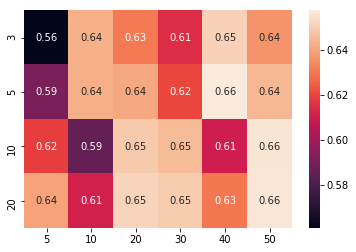

In [65]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [70]:
best_n_estimator_bow = 30
best_max_depth_bow = 10

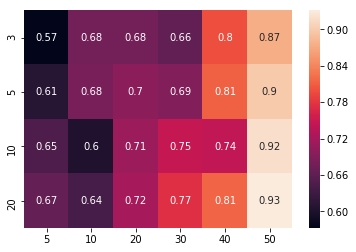

In [66]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

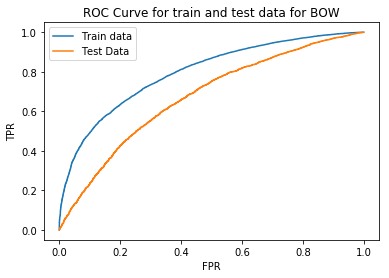

In [71]:
rf_best_model = RandomForestClassifier(n_estimators=best_n_estimator_bow, max_depth=best_max_depth_bow,
                                           class_weight='balanced')
rf_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = rf_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = rf_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_bow = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for BOW') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

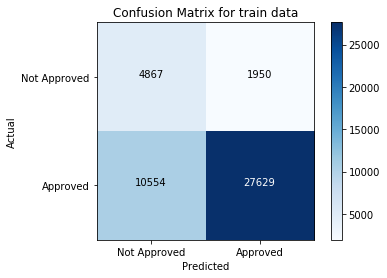

In [72]:
pred_labels_train = rf_best_model.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

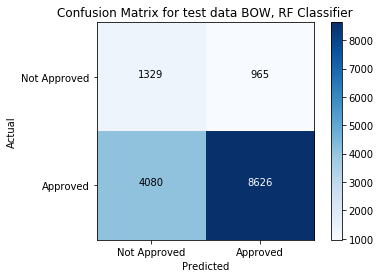

In [73]:
pred_labels_test = rf_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data BOW, RF Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [70]:
# Please write all the code with proper documentation

# Please write all the code with proper documentation


# tfidf for the test instances
text_tfidf_test = vectorizer_tfidf_text.transform(preprocessed_essays_test)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)


title_tfidf_test = vectorizer_tfidf_title.transform(preprocessed_titles_test)
print("Schape of matrix after one hot encoding ",title_tfidf.shape)

Shape of matrix after one hot encodig  (45000, 11773)
Schape of matrix after one hot encoding  (45000, 3030)


In [71]:
# https://stackoverflow.com/questions/30960412/concatenate-several-np-arrays-in-python
# concatenate multiple response features into one


X = hstack((response_features_concat_train, title_tfidf,text_tfidf,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,title_tfidf_test,text_tfidf_test,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [72]:
# Please write all the code with proper documentation

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV
model = GridSearchCV(RandomForestClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=2)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

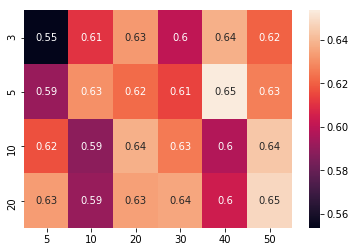

In [73]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [75]:
best_n_estimator_tfidf = 20
best_max_depth_tfidf = 10

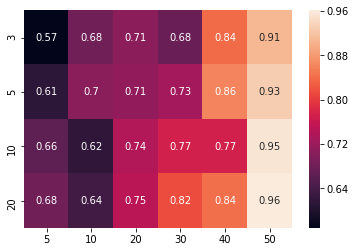

In [74]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

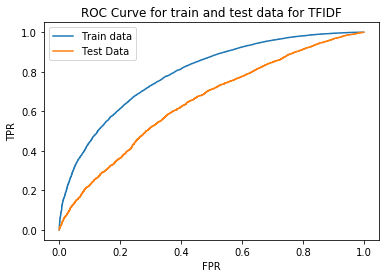

In [76]:
rf_best_model = RandomForestClassifier(n_estimators=best_n_estimator_tfidf, max_depth=best_max_depth_tfidf,
                                           class_weight='balanced')
rf_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = rf_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = rf_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_tfidf = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for TFIDF') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

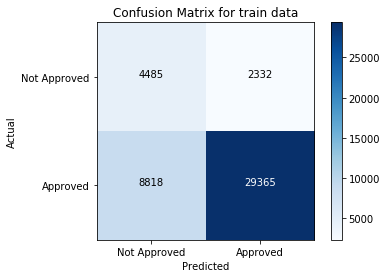

In [77]:
pred_labels_train = rf_best_model.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

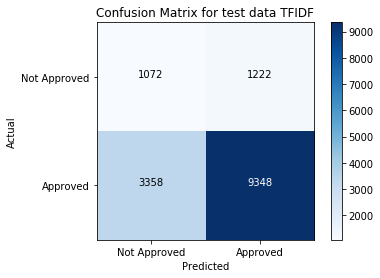

In [78]:
pred_labels_test = rf_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data TFIDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [79]:
print(auc_tfidf)

0.6476573136609289


### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [80]:
# Please write all the code with proper documentation

# avg w2v transformation for essays and titles for test set

avg_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model_glove[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))


# average Word2Vec
# compute average word2vec for each title.
avg_w2v_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model_glove[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles_test.append(vector)

print(len(avg_w2v_titles_test))
print(len(avg_w2v_titles_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4887.72it/s]


15000
300


100%|████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 102642.24it/s]


15000
300


In [81]:
# https://stackoverflow.com/questions/30960412/concatenate-several-np-arrays-in-python
# concatenate multiple response features into one


X = hstack((response_features_concat_train, avg_w2v_titles,avg_w2v_vectors,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,avg_w2v_titles_test,avg_w2v_vectors_test,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [82]:
# Please write all the code with proper documentation

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV
model = GridSearchCV(RandomForestClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=2)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

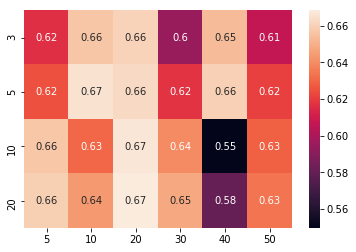

In [83]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [88]:
best_n_estimator_avgw2v =20
best_max_depth_avgw2v = 20

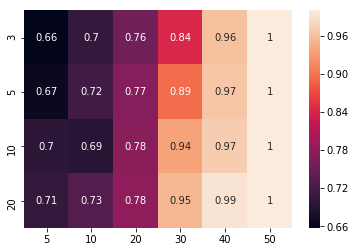

In [84]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

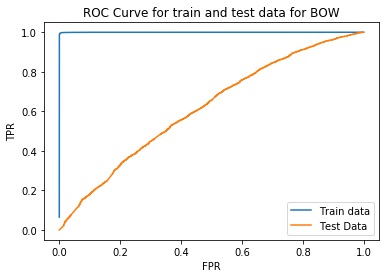

In [89]:
rf_best_model = RandomForestClassifier(n_estimators=best_n_estimator_avgw2v, max_depth=best_max_depth_avgw2v,
                                           class_weight='balanced')
rf_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = rf_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = rf_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_avgw2v = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for BOW') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

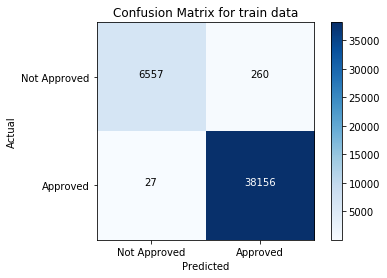

In [90]:
pred_labels_train = rf_best_model.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

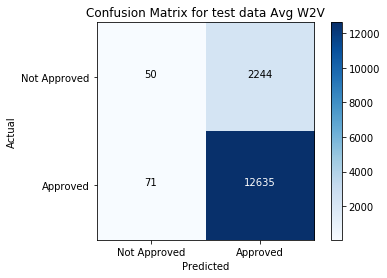

In [91]:
pred_labels_test = rf_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data Avg W2V')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [103]:
# Please write all the code with proper documentation

# Please write all the code with proper documentation
# Please write all the code with proper documentation

# vectorizing the essays and titles using TFIDF W2V

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model_glove[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_test.append(vector)

print(len(tfidf_w2v_vectors_test))
print(len(tfidf_w2v_vectors_test[0]))



tfidf_w2v_titles_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles_test): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model_glove[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_titles_test.append(vector)

print(len(tfidf_w2v_titles_test))
print(len(tfidf_w2v_titles_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 15000/15000 [00:18<00:00, 817.44it/s]


15000
300


100%|█████████████████████████████████████████████████████████████████████████| 15000/15000 [00:00<00:00, 48702.83it/s]


15000
300


In [68]:
# https://stackoverflow.com/questions/30960412/concatenate-several-np-arrays-in-python
# concatenate multiple response features into one


X = hstack((response_features_concat_train, tfidf_w2v_titles,tfidf_w2v_vectors,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,tfidf_w2v_titles_test,tfidf_w2v_vectors_test ,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [94]:
# Please write all the code with proper documentation

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV
model = GridSearchCV(RandomForestClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=4)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

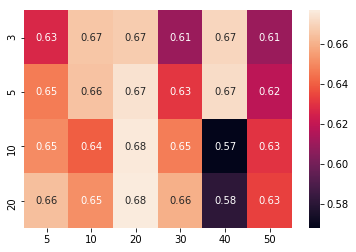

In [95]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [97]:
best_n_estimator_tfidf_w2v = 20
best_max_depth_tfidf_w2v = 10

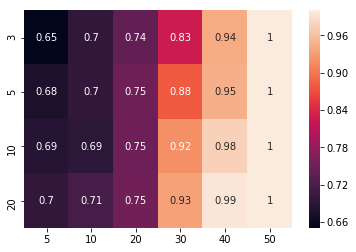

In [96]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

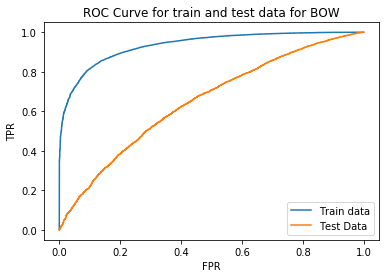

In [98]:
rf_best_model = RandomForestClassifier(n_estimators=best_n_estimator_tfidf_w2v, max_depth=best_max_depth_tfidf_w2v,
                                           class_weight='balanced')
rf_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = rf_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = rf_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_tfidf_w2v = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for BOW') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

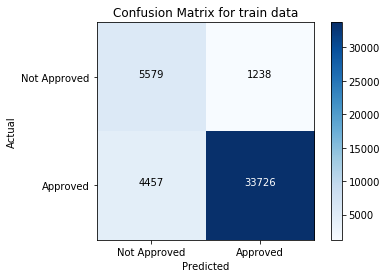

In [99]:
pred_labels_train = rf_best_model.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

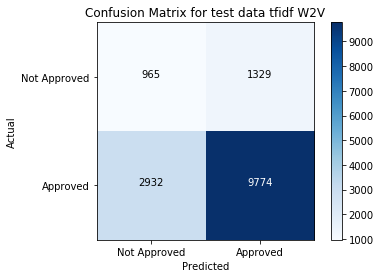

In [100]:
pred_labels_test = rf_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data tfidf W2V')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [101]:
print(auc_bow)
print(auc_tfidf)
print(auc_avgw2v)
print(auc_tfidf_w2v)

0.672549599685243
0.6482428342896854
0.6155435493683108
0.6504489706240975


<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [102]:
from scipy.sparse import hstack

X = hstack((response_features_concat_train, titles_bow,text_bow,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,titles_bow_test,text_bow_test,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [104]:
# Please write all the code with proper documentation
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV

model = GridSearchCV(xgb.XGBClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=4)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

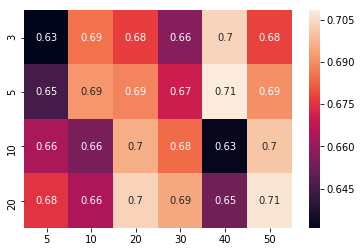

In [105]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [107]:
best_n_estimator_bow_xgb = 20
best_max_depth_bow_xgb = 20

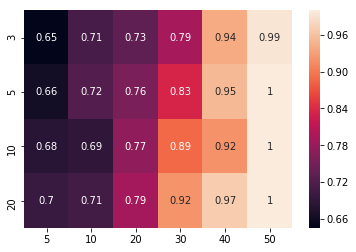

In [106]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

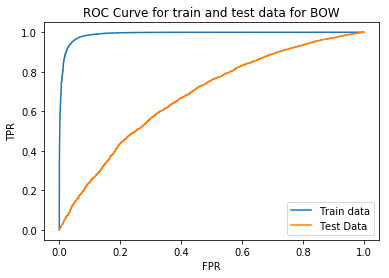

In [108]:
xgb_best_model = xgb.XGBClassifier(n_estimators=best_n_estimator_bow_xgb, max_depth=best_max_depth_bow_xgb,
                                           class_weight='balanced')
xgb_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = xgb_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = xgb_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_bow_xgb = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for BOW') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



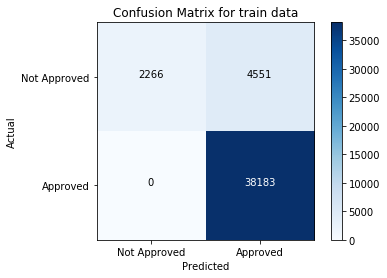

In [109]:
pred_labels_train = xgb_best_model.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



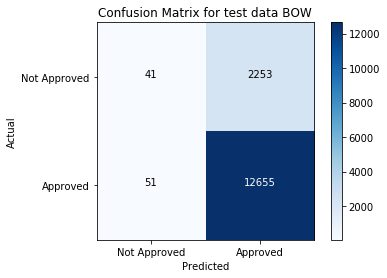

In [110]:
pred_labels_test = xgb_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data BOW')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [111]:
print(auc_bow_xgb)

0.680464669363107


### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [62]:
from scipy.sparse import hstack

X = hstack((response_features_concat_train, title_tfidf,text_tfidf,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,title_tfidf_test,text_tfidf_test,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [85]:
# Please write all the code with proper documentation

# Please write all the code with proper documentation
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV

model = GridSearchCV(xgb.XGBClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=2)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

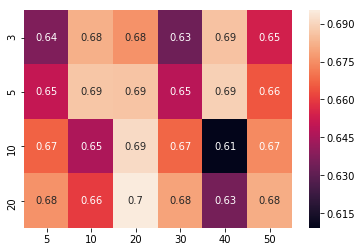

In [86]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [88]:
best_n_estimator_tfidf_xgb = 20
best_max_depth_tfidf_xgb = 5

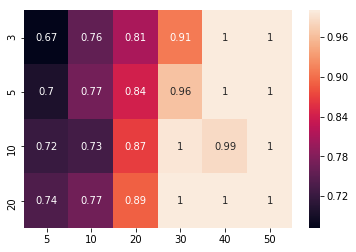

In [87]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

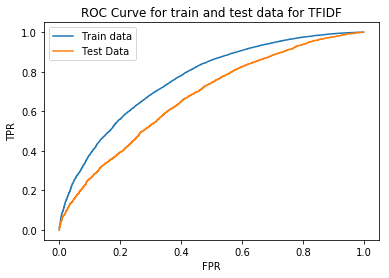

In [89]:
xgb_best_model = xgb.XGBClassifier(n_estimators=best_n_estimator_tfidf_xgb, max_depth=best_max_depth_tfidf_xgb,
                                           class_weight='balanced')
xgb_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = xgb_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = xgb_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_tfidf_xgb = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for TFIDF') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



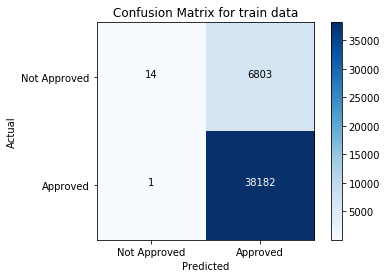

In [90]:
pred_labels_train = xgb_best_model.predict(train_data)

cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



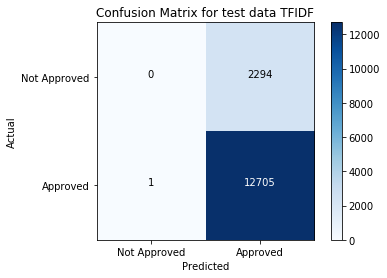

In [91]:
pred_labels_test = xgb_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data TFIDF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [92]:
print(auc_tfidf_xgb)

0.6735395451914953


### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [93]:
from scipy.sparse import hstack

X = hstack((response_features_concat_train, avg_w2v_titles,avg_w2v_vectors,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,avg_w2v_titles_test,avg_w2v_vectors_test,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [94]:
# Please write all the code with proper documentation

# Please write all the code with proper documentation
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV

model = GridSearchCV(xgb.XGBClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=2)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

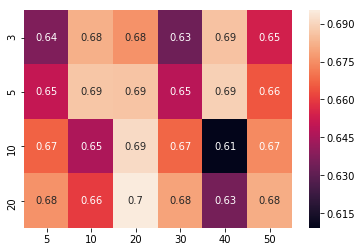

In [95]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [97]:
best_n_estimator_avgw2v_xgb = 10
best_max_depth_avgw2v_xgb = 5

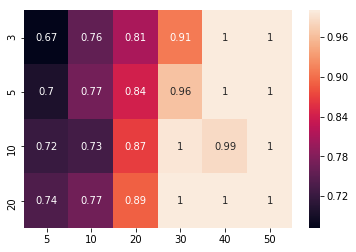

In [96]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

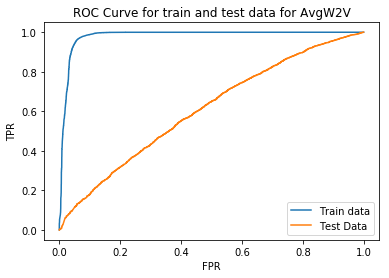

In [98]:
xgb_best_model = xgb.XGBClassifier(n_estimators=best_n_estimator_avgw2v_xgb, max_depth=best_max_depth_avgw2v_xgb,
                                           class_weight='balanced')
xgb_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = xgb_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = xgb_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_avgw2v_xgb = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for AvgW2V') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



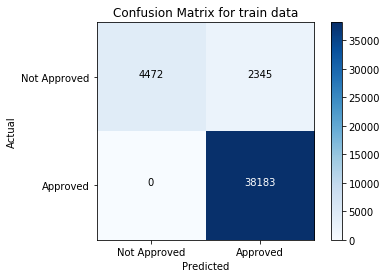

In [99]:
pred_labels_train = xgb_best_model.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



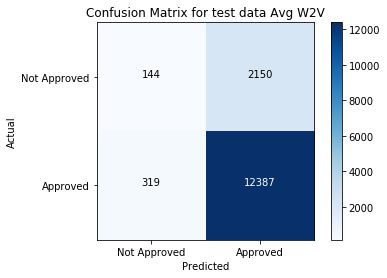

In [100]:
pred_labels_test = xgb_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data Avg W2V')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [101]:
print(auc_avgw2v_xgb)

0.6086243090503206


### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [104]:
from scipy.sparse import hstack

X = hstack((response_features_concat_train, tfidf_w2v_titles,tfidf_w2v_vectors,previous_projects_standardized,price_standardized))

train_data = X.todense()

X = hstack((response_features_concat_test,tfidf_w2v_titles_test,tfidf_w2v_vectors_test,previous_projects_standardized_test,
            price_standardized_test))

test_data = X.todense()

del X

In [105]:
# Please write all the code with proper documentation

# Please write all the code with proper documentation
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

n_estimators_vals = [5, 10, 20, 30, 40, 50]
max_depth_vals = [3, 5, 10, 20]

hyperparams = dict(max_depth=max_depth_vals, n_estimators =n_estimators_vals)

#Using randomsearchCV

model = GridSearchCV(xgb.XGBClassifier(), param_grid=hyperparams, scoring = 'roc_auc', cv=2)
model.fit(train_data, train_class_labels)

model_cv_results = pd.DataFrame(model.cv_results_)
model_cv_results.columns


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

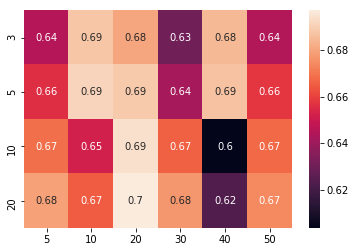

In [106]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

val_scores = np.array(model_cv_results['mean_test_score'])
val_scores_reshaped = val_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
val_scores_reshaped = val_scores_reshaped.T



sns.heatmap(val_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

In [108]:
best_n_estimator_tfidf_w2v_xgb = 10
best_max_depth_tfidf_w2v_xgb = 5

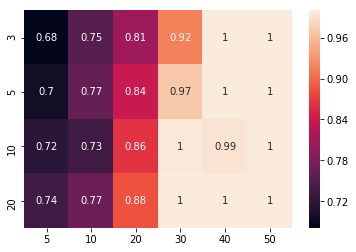

In [107]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

train_scores = np.array(model_cv_results['mean_train_score'])
train_scores_reshaped = train_scores.reshape((len(n_estimators_vals),len(max_depth_vals)))
train_scores_reshaped = train_scores_reshaped.T



sns.heatmap(train_scores_reshaped,xticklabels=n_estimators_vals,yticklabels=max_depth_vals,annot=True)

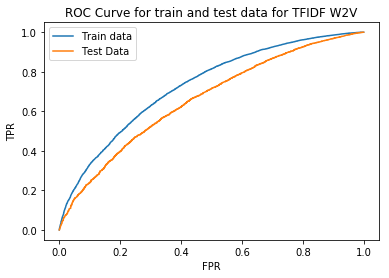

In [109]:
xgb_best_model = xgb.XGBClassifier(n_estimators=best_n_estimator_tfidf_w2v_xgb, max_depth=best_max_depth_tfidf_w2v_xgb,
                                           class_weight='balanced')
xgb_best_model.fit(train_data,train_class_labels)
    
# predict labels of test data
pred_labels_test = xgb_best_model.predict_proba(test_data)[:,1]

actual_labels_test = project_data_test['project_is_approved']

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(actual_labels_test,pred_labels_test)


# predict labels of train data
pred_labels_train = xgb_best_model.predict_proba(train_data)[:,1]

fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_class_labels, pred_labels_train)


auc_tfidf_w2v_xgb = metrics.auc(fpr_test, tpr_test)



# plot train and test data ROC curve

plt.plot(fpr_train, tpr_train, label = "Train data") 
  

# plotting the line 2 points  
plt.plot(fpr_test, tpr_test, label = "Test Data") 
  
# naming the x axis 
plt.xlabel('FPR') 
# naming the y axis 
plt.ylabel('TPR') 
# giving a title to my graph 
plt.title('ROC Curve for train and test data for TFIDF W2V') 
  
# show a legend on the plot 
plt.legend() 
  
# function to show the plot 
plt.show() 

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



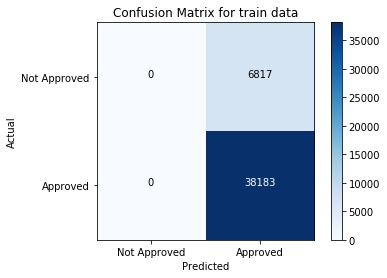

In [110]:
pred_labels_train = xgb_best_model.predict(train_data)
cf = confusion_matrix(train_class_labels,pred_labels_train)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for train data')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

C:\Users\NIT\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



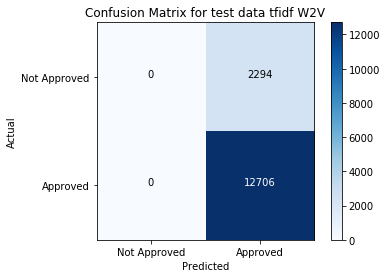

In [111]:
pred_labels_test = xgb_best_model.predict(test_data)
cf = confusion_matrix(actual_labels_test,pred_labels_test)
plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix for test data tfidf W2V')
plt.xlabel('Predicted')
plt.ylabel('Actual')

class_labels = ['Not Approved','Approved']
tick_marks = np.arange(len(set(class_labels))) # length of classes
tick_marks
plt.xticks(tick_marks,class_labels)
plt.yticks(tick_marks,class_labels)
# plotting text value inside cells
thresh = cf.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] >thresh else 'black')
plt.show();

In [113]:
print(auc_tfidf_w2v_xgb)

0.6591076187361661


<h1>3. Conclusion</h1>

In [112]:

# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
t = PrettyTable(['Classifier Name','Vectorizer Name', 'Best Max Depth','Best n-estimator','AUC Score'])
t.add_row(['Random Forrest', 'BOW', best_max_depth_bow, best_n_estimator_bow, auc_bow])
t.add_row(['Random Forrest', 'TF IDF', best_max_depth_tfidf, best_n_estimator_bow, auc_tfidf])                 
t.add_row(['Random Forrest', 'AVG W2V', best_max_depth_avgw2v, best_n_estimator_avgw2v, auc_avgw2v])            
t.add_row(['Random Forrest', 'TF IDF W2V', best_max_depth_tfidf_w2v, best_n_estimator_tfidf_w2v, auc_tfidf_w2v])
t.add_row(['XGBDT', 'BOW', best_max_depth_bow_xgb, best_n_estimator_bow_xgb, auc_bow_xgb])
t.add_row(['XGBDT', 'TFIDF', best_max_depth_tfidf_xgb, best_n_estimator_tfidf_xgb, auc_tfidf_xgb])
t.add_row(['XGBDT', 'Avg W2V', best_max_depth_avgw2v_xgb, best_n_estimator_avgw2v_xgb, auc_avgw2v_xgb])
t.add_row(['XGBDT', 'TFIDF W2V', best_max_depth_tfidf_w2v_xgb, best_n_estimator_tfidf_w2v_xgb, auc_tfidf_w2v_xgb])
print(t)

NameError: name 'best_max_depth_bow' is not defined

In [1]:
# due to power cut the system got shutdown before printing. so hard coding the auc and parameter values

from prettytable import PrettyTable
t = PrettyTable(['Classifier Name','Vectorizer Name', 'Best Max Depth','Best n-estimator','AUC Score'])
t.add_row(['Random Forrest', 'BOW', 30,10,0.6725])
t.add_row(['Random Forrest', 'TF IDF', 20,10,0.6476])
t.add_row(['Random Forrest', 'AVG W2V', 20,20,0.6155])
t.add_row(['Random Forrest', 'TF IDF W2V', 20,10,0.6504])
t.add_row(['XGBDT', 'BOW', 20,20,0.6804])
t.add_row(['XGBDT', 'TFIDF', 20,5,0.6735])
t.add_row(['XGBDT', 'Avg W2V', 10,5,0.6086])
t.add_row(['XGBDT', 'TFIDF W2V', 10,5,0.6591])
print(t) 

+-----------------+-----------------+----------------+------------------+-----------+
| Classifier Name | Vectorizer Name | Best Max Depth | Best n-estimator | AUC Score |
+-----------------+-----------------+----------------+------------------+-----------+
|  Random Forrest |       BOW       |       30       |        10        |   0.6725  |
|  Random Forrest |      TF IDF     |       20       |        10        |   0.6476  |
|  Random Forrest |     AVG W2V     |       20       |        20        |   0.6155  |
|  Random Forrest |    TF IDF W2V   |       20       |        10        |   0.6504  |
|      XGBDT      |       BOW       |       20       |        20        |   0.6804  |
|      XGBDT      |      TFIDF      |       20       |        5         |   0.6735  |
|      XGBDT      |     Avg W2V     |       10       |        5         |   0.6086  |
|      XGBDT      |    TFIDF W2V    |       10       |        5         |   0.6591  |
+-----------------+-----------------+----------------+